# Exercise 2

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv

np.random.seed(1234)

In [49]:
def make_data(n, p, mean=0, cov=1):
    mean_vector = np.full((p,), mean)
    
    cov_diag = np.full((p,), cov)
    cov_matrix = np.diagflat(cov_diag)
    
    observations_x = np.random.multivariate_normal(mean_vector, cov_matrix, n)
    k = 1
    p = 101
    y = ((3/10)**(k+p))*(observations_x**p)
    #y = 1.6 * observations_x + 6
    #a, m = 3., 2.
    #r = ((np.random.pareto(a, n*p) + 1) * m).reshape(n, p)
    #r = np.random.multivariate_normal(mean_vector, cov_matrix, n)
    #r = ((np.random.weibull(p, n*p))).reshape(n, p)          
    observations_y = y #+ r
    #print(r.shape)
    #print(observations_y.shape)
    
    return observations_x, observations_y

In [50]:
def linear_regression(train_X, train_Y, test_X, test_Y):
    regression_model = LinearRegression().fit(train_X, train_Y)

    train_results = regression_model.predict(train_X)
    test_results = regression_model.predict(test_X)

    train_error = mean_squared_error(train_Y, train_results)
    test_error = mean_squared_error(test_Y, test_results)
    parameters_norm = np.linalg.norm(regression_model.coef_)
    
    return train_error, test_error, parameters_norm

In [51]:
def test_regression(train_X, train_Y, test_X, test_Y, p):
    train_X = train_X[:,:p]
    test_X = test_X[:,:p]
    
    train_error, test_error, parameters_norm = linear_regression(train_X, train_Y, test_X, test_Y)
    
    return train_error, test_error, parameters_norm

In [52]:
n_train = 150
n_test = 100
max_features = 1000

train_X, train_Y = make_data(n_train, max_features, mean=0, cov=1)
test_X, test_Y = make_data(n_test, max_features, mean=0, cov=1)

ps = []
train_errors = []
test_errors = []
parameters_norms = []
with open('linear_regression_results.csv', 'w', newline='') as fout:
    writer = csv.DictWriter(fout, fieldnames=['# parameters', 'train loss', 'test loss', 'parameters norm'])
    writer.writeheader()
    for p in range(1, max_features, 50):
        train_error, test_error, parameters_norm = test_regression(train_X, train_Y, test_X, test_Y, p)
        ps.append(p)
        train_errors.append(train_error)
        test_errors.append(test_error)
        parameters_norms.append(parameters_norm)

        print('p: {} | train loss: {:.5f}; test loss: {:.5f}; norm: {:.5f}'.format(p, train_error, test_error, parameters_norm))

        writer.writerow({
            '# parameters': p,
            'train loss': train_error,
            'test loss': test_error,
            'parameters norm': parameters_norm
        })

p: 1 | train loss: 133827652744056092147843072.00000; test loss: 3644012223804148620984320.00000; norm: 25917981762553.40234
p: 51 | train loss: 86786865434559215233400832.00000; test loss: 83168600590411967359877120.00000; norm: 269415596308754.25000
p: 101 | train loss: 47309513333931857382735872.00000; test loss: 290206519517272246579101696.00000; norm: 522909219570660.87500
p: 151 | train loss: 0.13457; test loss: 131410273323888994264555716608.00000; norm: 10705096280040538.00000
p: 201 | train loss: 0.00163; test loss: 772110138369899113104801792.00000; norm: 843064598360115.62500
p: 251 | train loss: 0.00111; test loss: 279696860975003008122224640.00000; norm: 538402683317056.93750
p: 301 | train loss: 0.00200; test loss: 153993180537186285174915072.00000; norm: 410770821958796.93750
p: 351 | train loss: 0.00107; test loss: 108907475958534449049632768.00000; norm: 346143098948419.06250
p: 401 | train loss: 0.00122; test loss: 95994038885509728273694720.00000; norm: 3113156712755

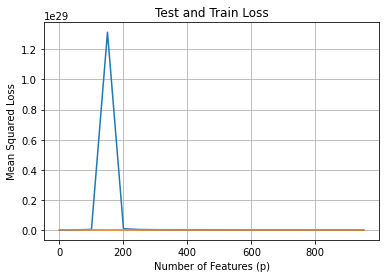

In [53]:
fig, ax = plt.subplots()
plt.plot(ps, test_errors)
ax.plot(ps, train_errors)

ax.set(xlabel='Number of Features (p)', ylabel='Mean Squared Loss',
       title='Test and Train Loss')
ax.grid()

(0.0, 30.0)

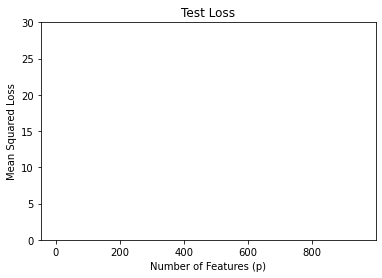

In [48]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Mean Squared Loss')
plt.title('Test Loss')
plt.plot(ps, test_errors)
plt.ylim(0, 30)

(0.0, 150.0)

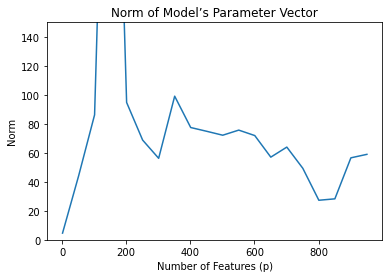

In [42]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Norm')
plt.title('Norm of Model’s Parameter Vector')
plt.plot(ps, parameters_norms)
plt.ylim(0, 150)